<a href="https://colab.research.google.com/github/Fabchirajoul/SDG/blob/main/SDG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import streamlit as st
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import plotly.express as px
import pandas as pd
from nltk.tokenize import sent_tokenize
import nltk
import regex as re

# Download NLTK tokenizer data
nltk.download('punkt')

# Model name or path to model
checkpoint = "sadickam/sdg-classification-bert"
# model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## Load the model

In [2]:
def load_model():
    return AutoModelForSequenceClassification.from_pretrained(checkpoint)

## Load the SDG Text File

In [3]:

file_path = "/content/SDG01.txt"


# Load the content of the file
with open(file_path, "r") as file:
    text_content = file.read()


## Load the Tokenizer

In [4]:
def load_tokenizer():
    tokenizer = AutoTokenizer.from_pretrained(checkpoint)
    return tokenizer

## Passing the Text file to the tokenizer

In [5]:
# tokenize pre-processed text
tokenizer_ = load_tokenizer()
tokenized_text = tokenizer_(text_content, return_tensors="pt", truncation=True, max_length=512)
# tokenized_text

## SDG LIST

In [6]:
# Predict text
model = load_model()
text_logits = model(**tokenized_text).logits
predictions = torch.softmax(text_logits, dim=1).tolist()[0]
predictions = [round(a, 3) for a in predictions]

# SDG labels list
label_list = [
    'GOAL 1: No Poverty',
    'GOAL 2: Zero Hunger',
    'GOAL 3: Good Health and Well-being',
    'GOAL 4: Quality Education',
    'GOAL 5: Gender Equality',
    'GOAL 6: Clean Water and Sanitation',
    'GOAL 7: Affordable and Clean Energy',
    'GOAL 8: Decent Work and Economic Growth',
    'GOAL 9: Industry, Innovation and Infrastructure',
    'GOAL 10: Reduced Inequality',
    'GOAL 11: Sustainable Cities and Communities',
    'GOAL 12: Responsible Consumption and Production',
    'GOAL 13: Climate Action',
    'GOAL 14: Life Below Water',
    'GOAL 15: Life on Land',
    'GOAL 16: Peace, Justice and Strong Institutions'
]

In [7]:
from IPython.display import display, Markdown



# Dictionary with label as key and percentage as value
pred_dict = (dict(zip(label_list, predictions)))

# Sort 'pred_dict' by value and index the highest at [0]
sorted_preds = sorted(pred_dict.items(), key=lambda x: x[1], reverse=True)

# Print predictions in the notebook
display(Markdown("##### Prediction outcome"))
display(Markdown(""))

# Display predictions as a DataFrame
df = pd.DataFrame(sorted_preds, columns=["SDG", "Likelihood"])
display(df)

# Display the predicted SDG and its confidence
display(Markdown(""))
display(Markdown("##### Predicted SDG:"))
display(Markdown(sorted_preds[0][0]))
display(Markdown("##### Prediction confidence:"))
display(Markdown(str(round(sorted_preds[0][1] * 100, 1)) + "%"))

##### Prediction outcome

,SDG,Likelihood
0,GOAL 1: No Poverty,0.887
1,GOAL 10: Reduced Inequality,0.096
2,GOAL 2: Zero Hunger,0.006
3,GOAL 8: Decent Work and Economic Growth,0.005
4,"GOAL 9: Industry, Innovation and Infrastructure",0.001
5,GOAL 11: Sustainable Cities and Communities,0.001
6,GOAL 3: Good Health and Well-being,0.000
7,GOAL 4: Quality Education,0.000
8,GOAL 5: Gender Equality,0.000
9,GOAL 6: Clean Water and Sanitation,0.000


##### Predicted SDG:

GOAL 1: No Poverty

##### Prediction confidence:

88.7%

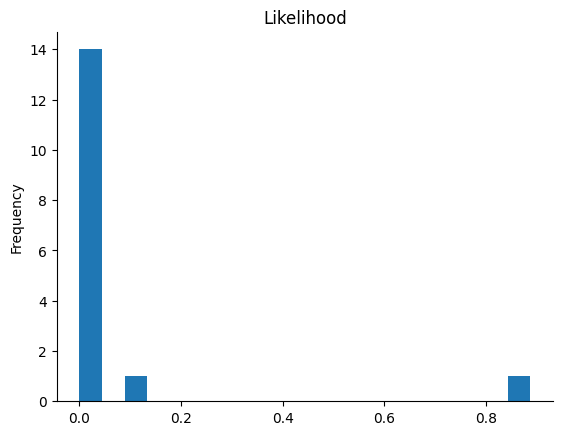

In [8]:
# @title Likelihood

from matplotlib import pyplot as plt
df['Likelihood'].plot(kind='hist', bins=20, title='Likelihood')
plt.gca().spines[['top', 'right',]].set_visible(False)